# Tutorial 03 in class exercises (randomization and bootstrapping)
## Goals
* Practice working through coding basics on your own
* Get a better intuition about when standard parametric t-tests and non-parametric approaches produce similar results and when they can diverge
* See the importance of plotting your data before you do anything else!
* Apply bootstrapping to some real EEG data to estimate confidence intervals

## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib
* maybe set up a standard font as well if you want to get fancy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
fig_font = {'fontname': 'Times New Roman', 'size': '18'}

## Part I: Start with some data.
* First plot it
* Then compute summary stats (mean, std) for each data array
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 
* Try to do this without copying from the in-class tutorial! Google the formulas if you don't remember them and then try to translate them into python (you can peek at in class tutorial if you get stuck, but its good practice to just hack it out)

[source of this famous data set: Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [2]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

## Plot data...scatter works well here
* First rule of data analysis...always plot your data first!

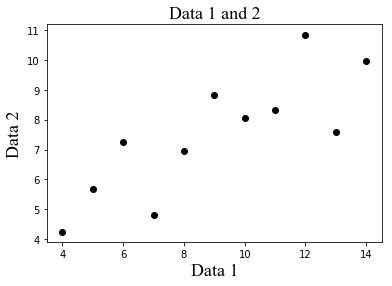

In [3]:
#plot the data
plt.scatter(d1, d2, color = 'k')
plt.xlabel('Data 1', fig_font)
plt.ylabel('Data 2', fig_font)
plt.title('Data 1 and 2', fig_font)
plt.show()

## Compute mean, std of both data arrays
* Leave the output in the notebook so that we can come back and compare later

In [3]:
#mean, std for d1
first_mean = np.mean(d1, axis = 0)
first_std = np.std(d1, axis = 0)
print('first mean:', first_mean, 'first std:', first_std)

first mean: 9.0 first std: 3.1622776601683795


In [4]:
#mean, std for d2
second_mean = np.mean(d2, axis = 0)
second_std = np.std(d2, axis = 0)
print('second mean:', second_mean, 'second std:', second_std)

second mean: 7.500909090909093 second std: 1.937024215108669


## Correlate the two data arrays, compute t-value and p-value associated with correlation coef

In [14]:
#correlate the two data arrays
corr_coef = np.corrcoef(d1,d2)[0,1]
print('correlation coefficient:', corr_coef)
from scipy.stats import linregress
linregress(d1,d2)

correlation coefficient: 0.81642051634484


LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

In [13]:
#compute t-value and p-value
n = len(d1)
t_value = (corr_coef*np.sqrt(n-2))/np.sqrt(1-corr_coef**2)
print('t-value:', t_value)
p_value = 2*(1-stats.t.cdf(t_value,n-1))
print('p-value:', p_value)

t-value: 4.241455288892834
p-value: 0.001712478019544772


## Now use randomization testing to eval the reliability of the estimated p-value. 

<div class="alert alert-info">
Before you run this procedure, you should have a pretty good idea about how the standard p-value will compare with the p-value that you estimate using randomization. Make a prediction!
</div>

Randomizations p-value: 0.02400000000000002
p-value from above: 0.001712478019544772


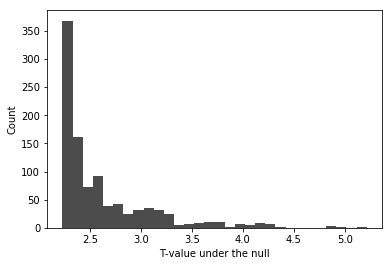

In [21]:
#randomization testing
nreps = 1000
randomizations_corr_coef = np.zeros(nreps)
randomizations_t_value = np.zeros(nreps)
tmp0 = np.zeros(n)
tmp1 = np.zeros(n)

for i in np.arange(nreps):
    for j in np.arange(n):
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else: 
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]
            
    #determine correlation btwn the data and determine t
    randomizations_corr_coef[i] = np.corrcoef(tmp0,tmp1)[0,1]
    randomizations_t_value[i] = (randomizations_corr_coef[i]*np.sqrt(n-2))/np.sqrt(1-randomizations_corr_coef[i]**2)
    #p-value
    randomizations_p_value = 2*(1-(np.sum(t_value > randomizations_t_value)/nreps))
print('Randomizations p-value:', randomizations_p_value)
print ('p-value from above:', p_value)
#plot the p-value distribution
plt.hist(randomizations_t_value, color = 'k', alpha = 0.7, bins = 30)
plt. xlabel ('T-value under the null')
plt.ylabel ('Count')
plt.show()


## Part II: Here is a second data set (actually, its another part of the Anscombe data set...but lets pretend like its an entirely new data set)

In [22]:
d1 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

## Break the first rule of data analysis, and BEFORE you plot the data, compute the mean and std of these two arrays
* What do you notice when you compare them to the mean and std of the arrays in the first part of the exercises?

In [24]:
#compute mean and std of first
new_first_mean = np.mean(d1, axis = 0)
new_first_std = np.std(d1, axis = 0)
print('new first mean:', new_first_mean,'new first std:', new_first_std)

#compute mean and std of second
new_second_mean = np.mean(d2, axis = 0)
new_second_std = np.std(d2, axis = 0)
print('new second mean:', new_second_mean, 'new second std:', new_second_std)

new first mean: 9.0 new first std: 3.1622776601683795
new second mean: 7.500909090909091 new second std: 1.9360806451340837


## Based only on your comparison of the mean and std of the data from Part I and Part II, what is your prediction about the effects of randomization testing on this new data set? 
* Will the randomization based p-value be similar to the standard p-value as it was in the example above?

## Ok - now plot the data

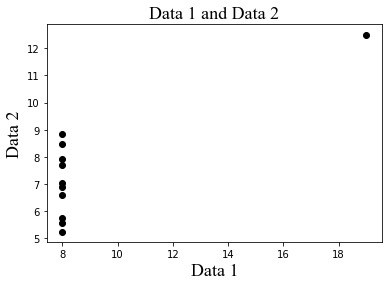

In [26]:
plt.scatter(d1, d2, color = 'k')
plt.xlabel('Data 1', fig_font)
plt.ylabel('Data 2', fig_font)
plt.title('Data 1 and Data 2', fig_font)
plt.show()

## Based on this, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* Remember that the mean and the std of the data sets in Part I and Part II are identical...
* Compute correlation coef, and do randomization testing

In [28]:
#compute correlation coefficient
new_corr_coef = np.corrcoef(d1,d2)[0,1]
print('new correlation coefficient:', new_corr_coef)
#compute t and p
n = len(d1)
new_t_value = (new_corr_coef*np.sqrt(n-2))/np.sqrt(1-new_corr_coef**2)
print('new t-value:', new_t_value)
new_p_value = 2*(1-stats.t.cdf(new_t_value,n-1))
print('new p-value:', new_p_value)

new correlation coefficient: 0.8165214368885028
new t-value: 4.243028188591634
new p-value: 0.0017082247651687421


## Compare the correlation coeffecients to those from Part I.
* So far, everything is pretty much the same between the data sets (same mean/std/corr coef)
* So should randomization testing yield about the same results? Try it...

Randomizations p-value: 0.4059999999999999
p-value from above: 0.001712478019544772


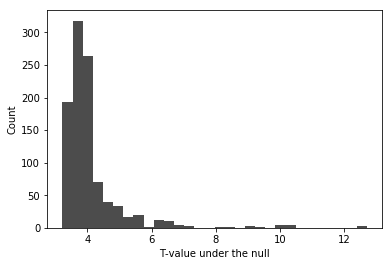

In [29]:
#randomization testing
nreps = 1000
randomizations_corr_coef = np.zeros(nreps)
randomizations_t_value = np.zeros(nreps)
tmp0 = np.zeros(n)
tmp1 = np.zeros(n)

for i in np.arange(nreps):
    for j in np.arange(n):
        if np.random.rand(1) < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else: 
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]
            
    #determine correlation btwn the data and determine t
    randomizations_corr_coef[i] = np.corrcoef(tmp0,tmp1)[0,1]
    randomizations_t_value[i] = (randomizations_corr_coef[i]*np.sqrt(n-2))/np.sqrt(1-randomizations_corr_coef[i]**2)
    #p-value
    randomizations_p_value = 2*(1-(np.sum(t_value > randomizations_t_value)/nreps))
print('Randomizations p-value:', randomizations_p_value)
print ('p-value from above:', p_value)
#plot the p-value distribution
plt.hist(randomizations_t_value, color = 'k', alpha = 0.7, bins = 30)
plt. xlabel ('T-value under the null')
plt.ylabel ('Count')
plt.show()

## Part III: Load in the second EEG data set from last week (eeg_data01.npz). 
* Pull out the data, sr, and tx arrays

In [3]:
# load the data...
eeg = np.load('eeg_data01.npz')

eeg['data']
eeg['sr']
eeg['tx']

data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

## Below is a vector that labels each trial as coming from experimental conditions 1,2,3,4

In [4]:
N = data.shape[0]
num_samp_cond = int(N/4)
cond = np.hstack((np.ones(num_samp_cond), np.ones(num_samp_cond)*2, np.ones(num_samp_cond)*3, np.ones(num_samp_cond)*4))

## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

[1.58107664 1.54630587 1.50327284 ... 9.33548888 9.31237348 9.28820523]
[1.4597094  1.48376586 1.50228366 ... 7.39233953 7.40442169 7.41126278]


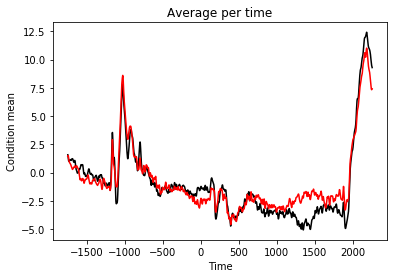

In [7]:
#avg condition 2
data_cond2 = data[cond == 2, :]
mean_data_cond2 = np.mean(data_cond2, 0)
print(mean_data_cond2)

#avg condition 3
data_cond3 = data[cond == 3,:]
mean_data_cond3 = np.mean(data_cond3, 0)
print(mean_data_cond3)

plt.plot(tx, mean_data_cond2, 'k-')
plt.plot (tx, mean_data_cond3, 'r-')
plt.xlabel('Time')
plt.ylabel('Condition mean')
plt.title('Average per time')
plt.show()

## Next do a t-test for related samples comparing the responses in conditions 2 and 3 at each point in time. Note - you can do this all in one line of code!

In [8]:
#t-test for related samples
t_value = stats.ttest_rel(data_cond2, data_cond3, axis = 0)
print(t_value)

Ttest_relResult(statistic=array([1.86704323e-01, 9.57567013e-02, 1.50816966e-03, ...,
       2.72632176e+00, 2.68161096e+00, 2.64216049e+00]), pvalue=array([0.85198736, 0.92376188, 0.99879741, ..., 0.00668677, 0.00763099,
       0.00856197]))


## now plot the averages in one plot, and then right below that make another plot with the t-values. Keep in mind that with this many degrees of freedom, a t-value of approx 1.9 is significant at the magic 0.05 level (or 1.68 one-tailed). So put some horizontal lines on the plot at 1.9 and -1.9. You'll see some pretty impressive t-values in the data!

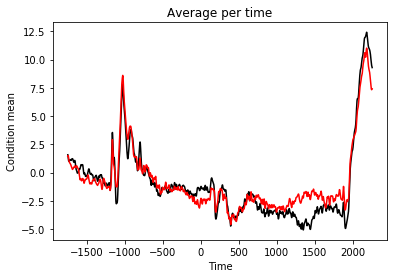

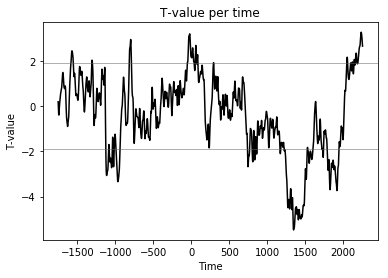

In [13]:
#plot the averages in one plot
plt.plot(tx, mean_data_cond2, 'k-')
plt.plot (tx, mean_data_cond3, 'r-')
plt.xlabel('Time')
plt.ylabel('Condition mean')
plt.title('Average per time')
plt.show()

#make another plot with the t-values
plt.plot(tx, t_value.statistic, 'k-')
plt.axhline(1.9, linewidth = 0.5)
plt.axhline(-1.9, linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('T-value')
plt.title('T-value per time')
plt.show()

## You should see that there is a significant difference at many timepoints...Now figure out how robust those effects are by applying bootstrapping 
* To do this, you might first create two 800 x 4102 matrices, one with data from all trials of condition 2, and one with data from all trials of condition 3
* Then resample 800 trials, with replacement, from each data matrix and then do the t-test. 
* try generating a set of 800 values with repeating numbers that you can use for a row index into the data matrices
* repeat and then compute CIs of the t-value
* how often do the CIs for the t-value overlap with 0???
* note - this can take a while, so start with 50 bootstraps and then increase as compute time allows

(1600, 4102)


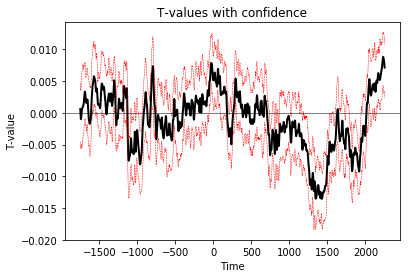

In [22]:
datashape = np.shape(data)
print(datashape)

data_cond2 = data[cond == 2,:]
data_cond3 = data[cond == 3,:]
N = data_cond2.shape[0]

#bootstrap trials
number_trials = 50
bootstrap_t_value = np.zeros((number_trials, data.shape[1]))

#bootstrap loop
for i in np.arange(number_trials):
    index2 = np.random.randint(num_samp_cond, size = num_samp_cond)
    index3 = np.random.randint(num_samp_cond, size = num_samp_cond)
    #get data
    tmp2 = data_cond2[index2]
    tmp3 = data_cond3[index3]
    #t-value
    tmp_t_value = np.mean(tmp2-tmp3, axis = 0)/ np.std(tmp2-tmp3, axis = 0) / np.sqrt(N-1)
    bootstrap_t_value[i,:] = tmp_t_value
    
#CI    
CI_t = np.percentile(bootstrap_t_value, [2.5, 97.5], axis = 0)
#mean bootstrap_t
mean_bootstrap_t_value = np.mean(bootstrap_t_value,0)

plt.plot(tx, mean_bootstrap_t_value, 'k-', linewidth =2)
plt.plot(tx, CI_t[0,], 'r--', linewidth = 0.5)
plt.plot(tx, CI_t[1,], 'r--', linewidth = 0.5)
plt.axhline(0, color ='k', linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('T-value')
plt.title('T-values with confidence')
plt.show()

## How do things compare?